In [1]:
import pandas as pd
import tqdm
import numpy as np
import json

In [2]:
import pandas as pd
import json

# File cleaned_data
df1 = pd.read_csv('/kaggle/input/preprocessing/cleaned_comments.csv')  # Đọc file CSV vào DataFrame
df1

,course_id,comment_id,text,text_cleaned
0,C_1641662,Cm_4606995,良好的教师职业道德对学生影响很大具体分为身体健康影响和心理健康影响良好的教师职业道德将会促使...,良好教师职业道德学生影响很大具体分为身体健康影响心理健康影响良好教师职业道德将会促使学生积极...
1,C_1641662,Cm_13487510,文化的影响,文化影响
2,C_1641662,Cm_10338533,为人师表以身作则,为人师表以身作则
3,C_1641662,Cm_11398691,教书育人,教书育人
4,C_1641662,Cm_6149788,爱国守法依法治教以人为本,爱国守法依法治教以人为本
...,...,...,...,...
1106964,C_681619,Cm_12527821,edta难纯化易和水体中金属离子反应,edta难纯化易水体金属离子反应
1106965,C_681619,Cm_12527889,网络问题,网络问题
1106966,C_681619,Cm_13167989,优秀,优秀
1106967,C_681619,Cm_13212632,baaac,baaac


In [3]:
df2 = df1.copy()

# Tính số dòng dữ liệu của từng `courseid`
course_count = df2.groupby('course_id').size().reset_index(name='count')

# Đổi tên các cột để dễ hiểu hơn
course_count.columns = ['course_id', 'count']
#Sắp xếp theo thứ tự count giảm dần
course_count = course_count.sort_values(by='count', ascending=False)

# Hiển thị kết quả
course_count[course_count['count']> 2000]

,course_id,count
21,C_1641662,5000
288,C_681669,5000
276,C_681396,5000
277,C_681432,5000
280,C_681488,5000
...,...,...
948,C_948265,2066
161,C_677038,2055
763,C_817691,2028
514,C_697019,2016


In [4]:
import pandas as pd

# Lọc các khóa học có số lượng dòng dữ liệu > 100
valid_courses = course_count[course_count['count'] > 100]['course_id']

# Lọc các dòng thuộc khóa học có count > 100
df_large_courses = df2[df2['course_id'].isin(valid_courses)].copy()  # Tạo bản sao để tránh cảnh báo

# Thêm cột 'count' biểu thị số lần lặp lại của mỗi dòng trong từng khóa học
df_large_courses['count'] = df_large_courses.groupby(['course_id', 'text'])['text'].transform('count')

# Loại bỏ các dòng trùng lặp (giữ dòng đầu tiên cho mỗi nhóm)
df_large_courses_unique = df_large_courses.drop_duplicates(subset=['course_id', 'text'])

# Lọc lại các khóa học có count <= 100 (giữ nguyên)
df_small_courses = df2[~df2['course_id'].isin(valid_courses)].copy()  # Tạo bản sao để tránh cảnh báo
df_small_courses['count'] = 1  # Các dòng không trùng lặp trong các khóa học nhỏ sẽ có 'count' = 1

# Kết hợp lại dữ liệu sau khi xử lý
df3 = pd.concat([df_large_courses_unique, df_small_courses], ignore_index=True)

# In kết quả
print(f"Trước khi loại bỏ: {len(df2)} dòng")
print(f"Sau khi loại bỏ: {len(df3)} dòng")

# Xem kết quả
df3.head()

Trước khi loại bỏ: 1106969 dòng
Sau khi loại bỏ: 461625 dòng


,course_id,comment_id,text,text_cleaned,count
0,C_1641662,Cm_4606995,良好的教师职业道德对学生影响很大具体分为身体健康影响和心理健康影响良好的教师职业道德将会促使...,良好教师职业道德学生影响很大具体分为身体健康影响心理健康影响良好教师职业道德将会促使学生积极...,1.0
1,C_1641662,Cm_13487510,文化的影响,文化影响,2.0
2,C_1641662,Cm_10338533,为人师表以身作则,为人师表以身作则,9.0
3,C_1641662,Cm_11398691,教书育人,教书育人,58.0
4,C_1641662,Cm_6149788,爱国守法依法治教以人为本,爱国守法依法治教以人为本,1.0


In [5]:
import pandas as pd

# Giả sử df2 là DataFrame gốc của bạn
df4 = df3.copy()

# Đảm bảo cột 'course_id' là kiểu chuỗi (nếu cần thiết)
df4['course_id'] = df4['course_id'].astype(str)

# Đảm bảo cột 'count' là kiểu số (nếu đã tồn tại)
if 'count' in df4.columns:
    df4['count'] = pd.to_numeric(df4['count'], errors='coerce')

# Thêm cột 'sum' đếm tổng số dòng dữ liệu cho từng khóa học
df4['sum'] = df4.groupby('course_id')['course_id'].transform('size')

# Lọc ra các khóa học có 'sum' > 1000
df_filtered = df4[df4['sum'] >1000]

# Lọc ra các khóa học có 'sum' <= 1000
df_other = df4[df4['sum'] <= 1000]

# Lấy ngẫu nhiên 1000 dòng cho mỗi khóa học có 'sum' > 1000 (bỏ cột nhóm khi áp dụng hàm)
df_filtered_sampled = (
    df_filtered.groupby('course_id', group_keys=False)  # Đảm bảo không thêm cột nhóm
    .apply(lambda x: x.sample(n=1000, random_state=42) if len(x) > 1000 else x)
)

# Reset lại index sau khi nhóm và lấy mẫu
df_filtered_sampled = df_filtered_sampled.reset_index(drop=True)

# Kết hợp các khóa học đã được lấy mẫu và các khóa học có 'sum' <= 1000
final_df = pd.concat([df_filtered_sampled, df_other], ignore_index=True)

# Reset lại index cuối cùng
final_df['sum'] = final_df.groupby('course_id')['course_id'].transform('size')
final_df = final_df.reset_index(drop=True)

# Hiển thị kết quả
print(f"Tổng số dòng dữ liệu cuối cùng: {len(final_df)}")
final_df.head()

Tổng số dòng dữ liệu cuối cùng: 297627


/tmp/ipykernel_23/762683342.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=1000, random_state=42) if len(x) > 1000 else x)


,course_id,comment_id,text,text_cleaned,count,sum
0,C_1641662,Cm_6161483,权力和义务是统一的教师应当履行自己的义务运用法律维护自己的权利,权力义务统一教师应当履行义务运用法律维护权利,1.0,1000
1,C_1641662,Cm_5503206,教师的幸福的实现不仅需要教师用乐观积极的心态去面对教育工作用认真进取的态度去寻求专业发展还需...,教师幸福实现需要教师乐观积极心态面对教育工作认真进取态度寻求专业发展需要教师以较高品德修养充...,1.0,1000
2,C_1641662,Cm_12911076,最根本的特点是行业特殊性,根本特点行业特殊性,1.0,1000
3,C_1641662,Cm_9784348,老师的一言一行都会给学生带来影响老师应当为人师表,老师一言一行学生带来影响老师应当为人师表,1.0,1000
4,C_1641662,Cm_12611699,爱岗与敬业是一种相辅相成辩证统一的关系爱岗是敬业的前提基础和动力敬业是爱岗的表现和升华不爱岗...,爱岗敬业相辅相成辩证统一关系爱岗敬业前提基础动力敬业爱岗表现升华爱岗很难做到敬业敬业很难说真...,1.0,1000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


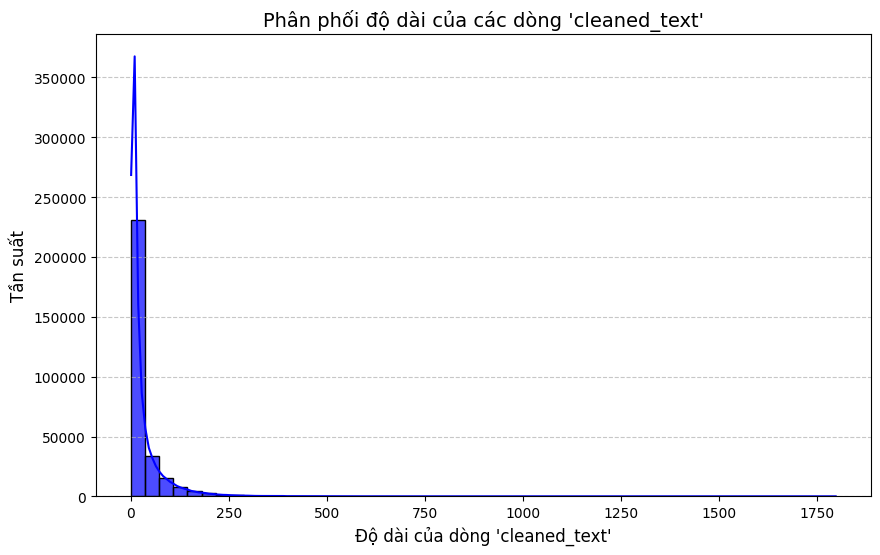

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = final_df.copy()
# Giả sử df là DataFrame của bạn với cột 'cleaned_text'
# Tính độ dài của mỗi dòng 'cleaned_text'
df['text_length'] = df['text_cleaned'].str.len()

# Vẽ biểu đồ phân phối độ dài
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True, color='blue', alpha=0.7)
plt.title("Phân phối độ dài của các dòng 'cleaned_text'", fontsize=14)
plt.xlabel("Độ dài của dòng 'cleaned_text'", fontsize=12)
plt.ylabel("Tần suất", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [7]:
df[df['text_length']> 250]

,course_id,comment_id,text,text_cleaned,count,sum,text_length
6,C_1641662,Cm_6513330,1教师专业素养的内容包括专业道德专业知识专业能力教师职业道德的专业基准对于学习和研究教师取业...,1教师专业素养内容包括专业道德专业知识专业能力教师职业道德专业基准学习研究教师取业道德促进作...,1.0,1000,441.0
20,C_1641662,Cm_10618310,一古往今来教师被人们誉为人类灵魂的工程师教师承担着传播人类文化开发人类智能帮助学生形成科学的...,古往今来教师誉为人类灵魂工程师教师承担传播人类文化开发人类智能帮助学生形成科学世界观正确人生...,1.0,1000,279.0
56,C_1641662,Cm_11138244,1教师职业道德的基准为研究教师职业道德提供了一个基础对于学习研究教师职业道德具有指导和促进作...,1教师职业道德基准研究教师职业道德提供基础学习研究教师职业道德具有指导促进作用促进教师职业道...,1.0,1000,357.0
73,C_1641662,Cm_6510340,道德是由思想行为所表现的有一定标准的社会风俗习惯等美德美就是美的事物德古称之为得合起来解释就...,道德思想行为表现一定标准社会风俗习惯美德美美的事物德古称之为得合起来解释美的事物吸引得到社会...,1.0,1000,344.0
90,C_1641662,Cm_13447039,教师的职业道德文化基准就是指延续至今的中国传统文化中关于教师准入条件教师基本素质和教师标准的...,教师职业道德文化基准就是指延续中国传统文化教师准入条件教师基本素质教师标准基本要求中国教育文...,1.0,1000,327.0
...,...,...,...,...,...,...,...
295505,C_735300,Cm_11758536,讨论2公开竞争性招标充分贴合项目采购中经济型效率性公平公开的原则从制度上使采购的第一步更优化...,讨论2公开竞争性招标充分贴合项目采购经济型效率性公平公开原则制度采购第一步优化国家化合同管理...,1.0,88,387.0
295798,C_682138,Cm_395008,数字水印技术具有安全性隐蔽性鲁棒性和敏感性等几个方面的特点按水印的特性可以将数字水印分为鲁棒...,数字水印技术具有安全性隐蔽性鲁棒性敏感性几个方面特点水印特性数字水印分为鲁棒数字水印脆弱数字...,1.0,70,291.0
296737,C_1410117,Cm_15789665,职业生涯管理是现代企业人力资源管理的重要内容之一是企业帮助员工制定职业生涯规划和帮助其职业生...,职业生涯管理现代企业人力资源管理重要内容企业帮助员工制定职业生涯规划帮助职业生涯发展一系列活...,1.0,93,255.0
296943,C_948128,Cm_14204408,答1gnp更能反应一个国家的经济实力因为gnp是按照国籍原则来确定的gdp是按国土原则来确定...,答1gnp更能反应国家经济实力gnp国籍原则确定gdp国土原则确定gdp包含外国公司本国创造...,1.0,18,396.0


In [8]:
df['text_cleaned'] = df['text_cleaned'].astype(str)

In [9]:
import jieba.posseg as pseg
import pandas as pd
from tqdm import tqdm

# Hàm lọc từ không mang thông tin cảm xúc
def filter_emotional_words(text):
    if len(text) > 150:  # Chỉ lọc các câu có độ dài > 150 ký tự
        words = pseg.cut(text)
        relevant_tags = {'v', 'a'}  # v: động từ, a: tính từ
        filtered_words = [word for word, tag in words if tag in relevant_tags]
        return " ".join(filtered_words)
    else:
        return text  # Giữ nguyên câu nếu độ dài <= 150 ký tự

# Áp dụng hàm lọc cho toàn bộ cột 'cleaned_text' với thanh tiến độ
tqdm.pandas()  # Kích hoạt tiến độ cho pandas
df['filtered_text'] = df['text_cleaned'].progress_apply(filter_emotional_words)

# Tính độ dài của text đã được lọc
df['text_length_2'] = df['filtered_text'].str.len()

# Đổi tên cột 'text_cleaned' thành 'cleaned_text'
df = df.rename(columns={'text_cleaned': 'cleaned_text'})

# Hiển thị kết quả
df

  0%|          | 0/297627 [00:00<?, ?it/s]Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.674 seconds.
Prefix dict has been built successfully.
100%|██████████| 297627/297627 [00:35<00:00, 8341.18it/s] 


,course_id,comment_id,text,cleaned_text,count,sum,text_length,filtered_text,text_length_2
0,C_1641662,Cm_6161483,权力和义务是统一的教师应当履行自己的义务运用法律维护自己的权利,权力义务统一教师应当履行义务运用法律维护权利,1.0,1000,22.0,权力义务统一教师应当履行义务运用法律维护权利,22
1,C_1641662,Cm_5503206,教师的幸福的实现不仅需要教师用乐观积极的心态去面对教育工作用认真进取的态度去寻求专业发展还需...,教师幸福实现需要教师乐观积极心态面对教育工作认真进取态度寻求专业发展需要教师以较高品德修养充...,1.0,1000,65.0,教师幸福实现需要教师乐观积极心态面对教育工作认真进取态度寻求专业发展需要教师以较高品德修养充...,65
2,C_1641662,Cm_12911076,最根本的特点是行业特殊性,根本特点行业特殊性,1.0,1000,9.0,根本特点行业特殊性,9
3,C_1641662,Cm_9784348,老师的一言一行都会给学生带来影响老师应当为人师表,老师一言一行学生带来影响老师应当为人师表,1.0,1000,20.0,老师一言一行学生带来影响老师应当为人师表,20
4,C_1641662,Cm_12611699,爱岗与敬业是一种相辅相成辩证统一的关系爱岗是敬业的前提基础和动力敬业是爱岗的表现和升华不爱岗...,爱岗敬业相辅相成辩证统一关系爱岗敬业前提基础动力敬业爱岗表现升华爱岗很难做到敬业敬业很难说真...,1.0,1000,107.0,爱岗敬业相辅相成辩证统一关系爱岗敬业前提基础动力敬业爱岗表现升华爱岗很难做到敬业敬业很难说真...,107
...,...,...,...,...,...,...,...,...,...
297622,C_681619,Cm_12527821,edta难纯化易和水体中金属离子反应,edta难纯化易水体金属离子反应,1.0,19,16.0,edta难纯化易水体金属离子反应,16
297623,C_681619,Cm_12527889,网络问题,网络问题,1.0,19,4.0,网络问题,4
297624,C_681619,Cm_13167989,优秀,优秀,1.0,19,2.0,优秀,2
297625,C_681619,Cm_13212632,baaac,baaac,1.0,19,5.0,baaac,5


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


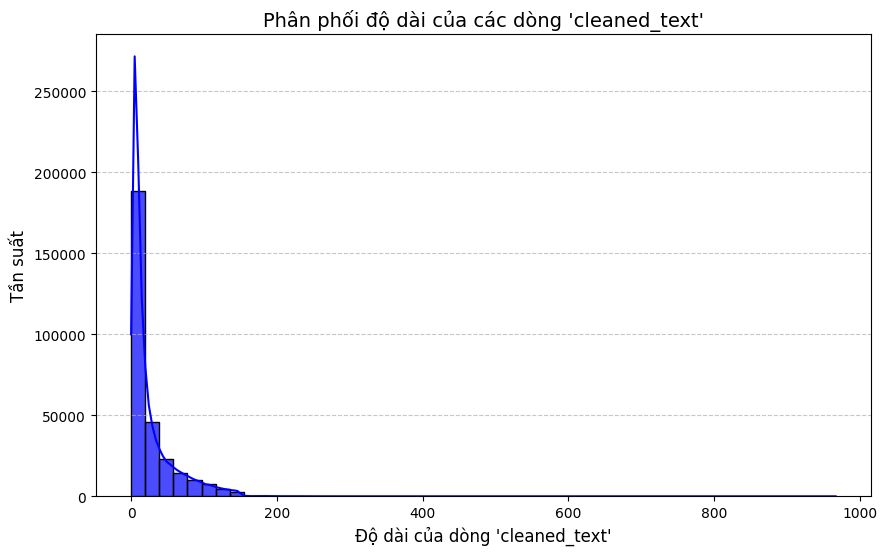

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ biểu đồ phân phối độ dài
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length_2'], bins=50, kde=True, color='blue', alpha=0.7)
plt.title("Phân phối độ dài của các dòng 'cleaned_text'", fontsize=14)
plt.xlabel("Độ dài của dòng 'cleaned_text'", fontsize=12)
plt.ylabel("Tần suất", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
df = df.drop(columns = {'sum', 'text_length', 'text_length_2'})
df = df[['course_id', 'comment_id', 'text', 'cleaned_text', 'filtered_text', 'count']]
df.head(5)

,course_id,comment_id,text,cleaned_text,filtered_text,count
0,C_1641662,Cm_6161483,权力和义务是统一的教师应当履行自己的义务运用法律维护自己的权利,权力义务统一教师应当履行义务运用法律维护权利,权力义务统一教师应当履行义务运用法律维护权利,1.0
1,C_1641662,Cm_5503206,教师的幸福的实现不仅需要教师用乐观积极的心态去面对教育工作用认真进取的态度去寻求专业发展还需...,教师幸福实现需要教师乐观积极心态面对教育工作认真进取态度寻求专业发展需要教师以较高品德修养充...,教师幸福实现需要教师乐观积极心态面对教育工作认真进取态度寻求专业发展需要教师以较高品德修养充...,1.0
2,C_1641662,Cm_12911076,最根本的特点是行业特殊性,根本特点行业特殊性,根本特点行业特殊性,1.0
3,C_1641662,Cm_9784348,老师的一言一行都会给学生带来影响老师应当为人师表,老师一言一行学生带来影响老师应当为人师表,老师一言一行学生带来影响老师应当为人师表,1.0
4,C_1641662,Cm_12611699,爱岗与敬业是一种相辅相成辩证统一的关系爱岗是敬业的前提基础和动力敬业是爱岗的表现和升华不爱岗...,爱岗敬业相辅相成辩证统一关系爱岗敬业前提基础动力敬业爱岗表现升华爱岗很难做到敬业敬业很难说真...,爱岗敬业相辅相成辩证统一关系爱岗敬业前提基础动力敬业爱岗表现升华爱岗很难做到敬业敬业很难说真...,1.0


In [12]:
df.to_csv(f'/kaggle/working/cleaned_comments_1.csv', index=False)

In [13]:
df = df[['course_id', 'text', 'filtered_text', 'count']]
df.to_csv(f'/kaggle/working/cleaned_comments_2.csv', index=False)
df

,course_id,text,filtered_text,count
0,C_1641662,权力和义务是统一的教师应当履行自己的义务运用法律维护自己的权利,权力义务统一教师应当履行义务运用法律维护权利,1.0
1,C_1641662,教师的幸福的实现不仅需要教师用乐观积极的心态去面对教育工作用认真进取的态度去寻求专业发展还需...,教师幸福实现需要教师乐观积极心态面对教育工作认真进取态度寻求专业发展需要教师以较高品德修养充...,1.0
2,C_1641662,最根本的特点是行业特殊性,根本特点行业特殊性,1.0
3,C_1641662,老师的一言一行都会给学生带来影响老师应当为人师表,老师一言一行学生带来影响老师应当为人师表,1.0
4,C_1641662,爱岗与敬业是一种相辅相成辩证统一的关系爱岗是敬业的前提基础和动力敬业是爱岗的表现和升华不爱岗...,爱岗敬业相辅相成辩证统一关系爱岗敬业前提基础动力敬业爱岗表现升华爱岗很难做到敬业敬业很难说真...,1.0
...,...,...,...,...
297622,C_681619,edta难纯化易和水体中金属离子反应,edta难纯化易水体金属离子反应,1.0
297623,C_681619,网络问题,网络问题,1.0
297624,C_681619,优秀,优秀,1.0
297625,C_681619,baaac,baaac,1.0


In [14]:
import pandas as pd
import os

# Tạo thư mục để lưu các file nhỏ
output_folder = '/kaggle/working/cleaned_comments'
os.makedirs(output_folder, exist_ok=True)

# Nhóm dữ liệu theo 'course_id'
grouped = df.groupby('course_id')

# Chia nhóm thành 20 phần
chunks = 19
chunk_size = len(grouped) // chunks  # Kích thước mỗi phần
chunked_groups = [group for _, group in grouped]

# Nếu không chia hết, phần còn lại sẽ được thêm vào
chunks = [chunked_groups[i:i + chunk_size] for i in range(0, len(chunked_groups), chunk_size)]

# Lưu từng phần vào file CSV
for i, chunk in enumerate(chunks):
    chunk_df = pd.concat(chunk)
    chunk_df.to_csv(f'{output_folder}/file_{i+1}.csv', index=False)

print(f'Đã lưu {len(chunks)} file dữ liệu vào thư mục {output_folder}')

Đã lưu 20 file dữ liệu vào thư mục /kaggle/working/cleaned_comments
